In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [64]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

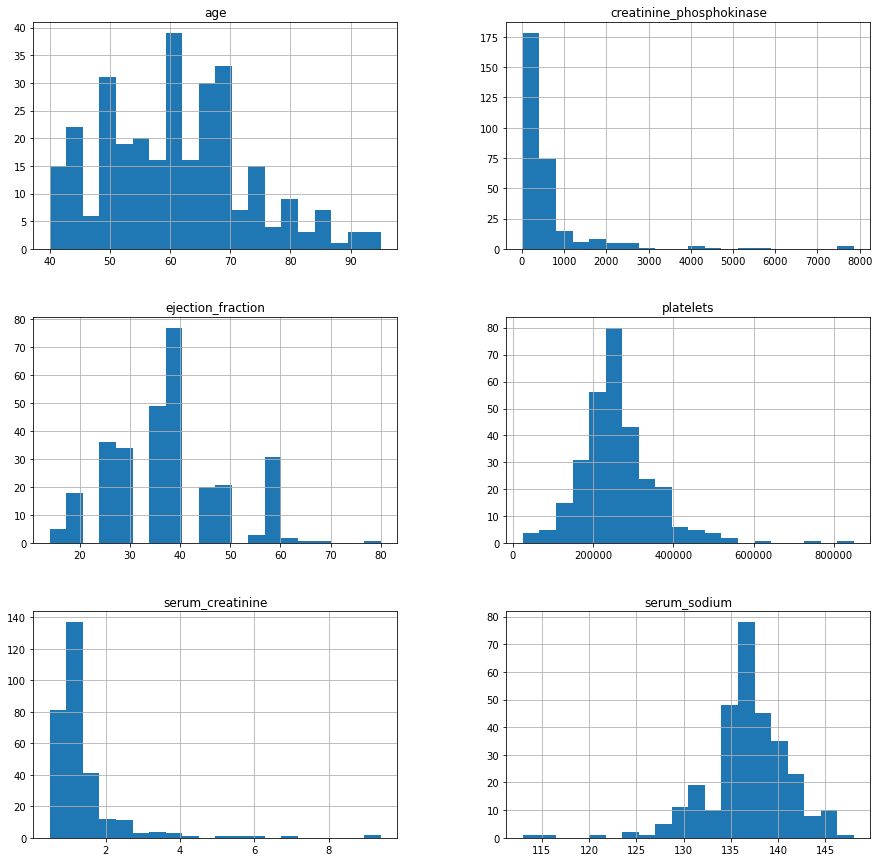

In [65]:
df[['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].hist(bins=20,
                                                                               figsize=(15, 15))
plt.show()

In [66]:
continous_var = ['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
df[continous_var].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


In [67]:
df['sex1'] = df['sex'].replace({1: "Male", 0: "Female"})
df['death'] = df['DEATH_EVENT'].replace({1: "yes", 0: "no"})

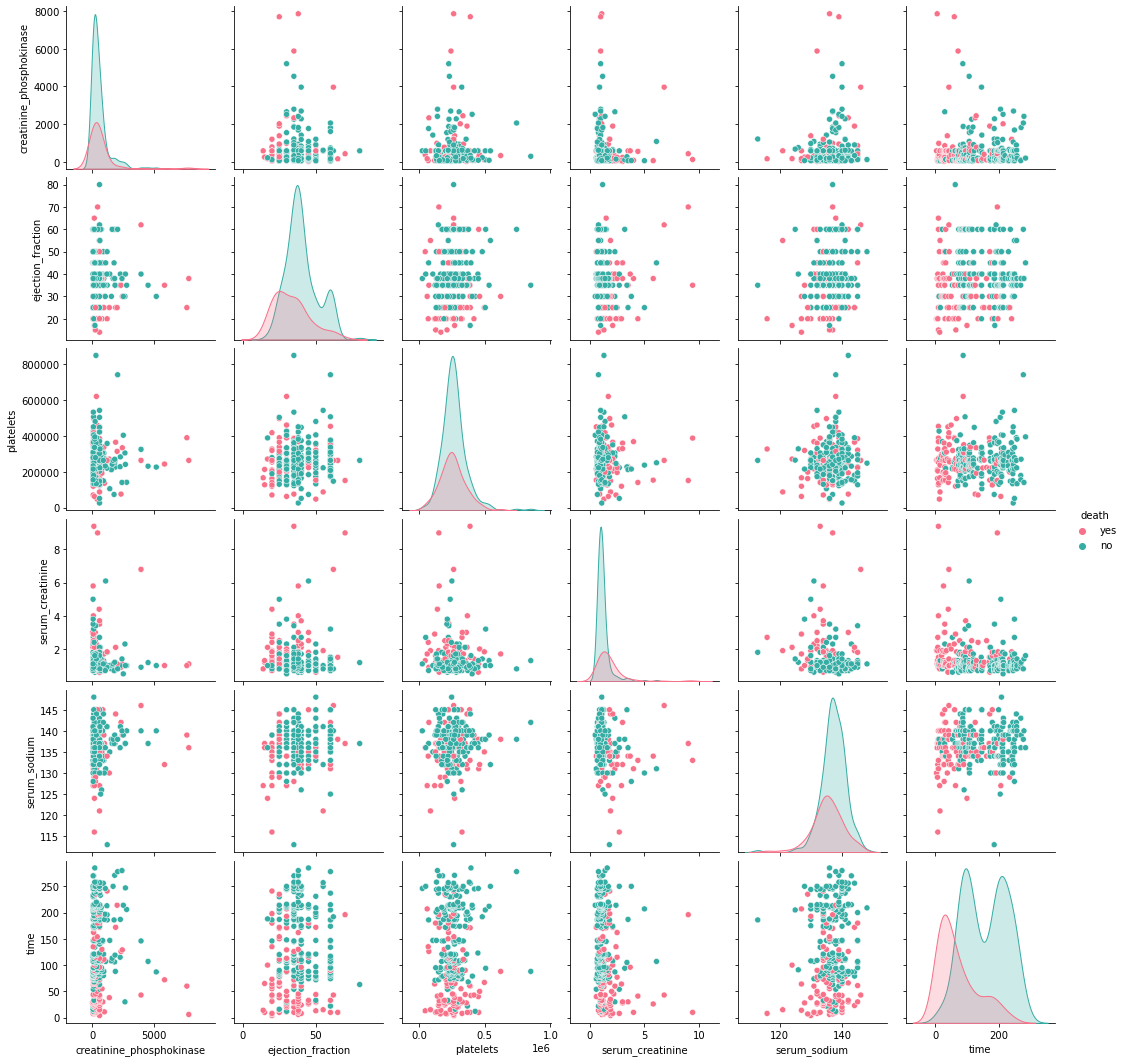

In [68]:
sns.pairplot(df[["creatinine_phosphokinase", "ejection_fraction",
                       "platelets", "serum_creatinine",
                       "serum_sodium", "time", "death"]], hue = "death", 
            diag_kind='kde', kind='scatter', palette='husl')
plt.show()

C:\Users\sadaf\anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sadaf\anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sadaf\anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sadaf\anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sadaf\anaconda3\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sadaf\anaconda3\lib\site-packag

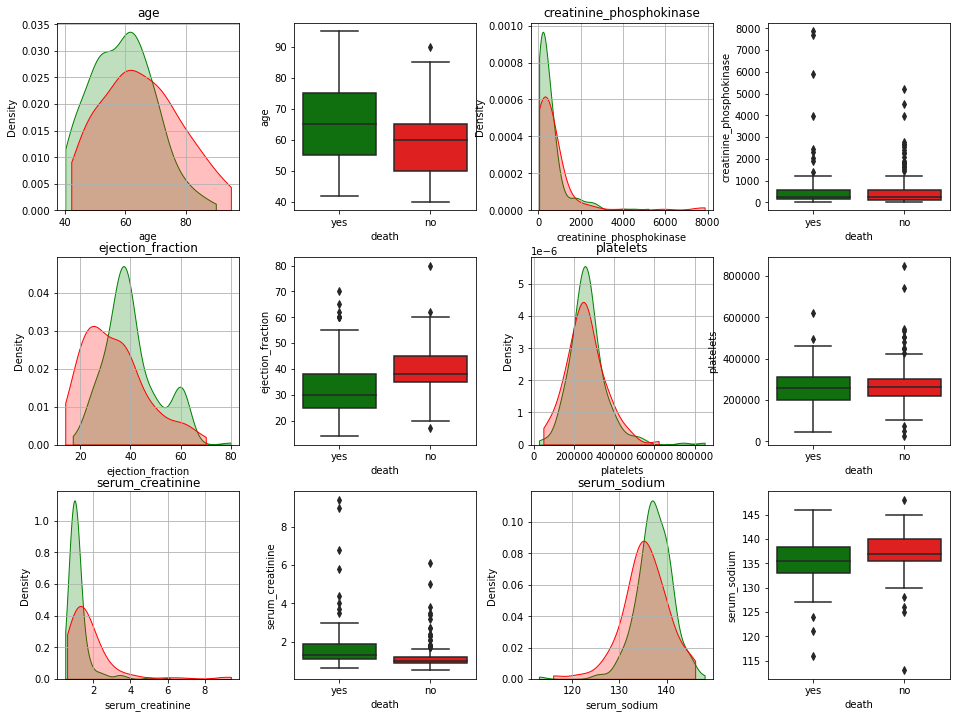

In [69]:
continous_var = ['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
plt.figure(figsize=(16, 25))
for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df["death"]=='no', col], label="alive", color = "green", shade=True, kernel='gau', cut=0)
    sns.kdeplot(df.loc[df["death"]=='yes', col], label="dead",  color = "red", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = df, x="death", palette = ["green", "red"])

In [70]:
y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])
y

<ipython-input-70-42537b0c7a15>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])


creatinine_phosphokinase        ejection_fraction             platelets  \
                          mean median              mean median           mean   
death                                                                           
no                  540.054187    245          40.26601     38  266657.489901   
yes                 670.197917    259          33.46875     30  256381.044792   

                serum_creatinine        serum_sodium               time         
         median             mean median         mean median        mean median  
death                                                                           
no     263000.0         1.184877    1.0   137.216749  137.0  158.339901  172.0  
yes    258500.0         1.835833    1.3   135.375000  135.5   70.885417   44.5

In [71]:
df.groupby(['sex1', 'high_blood_pressure', 'death']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

death                             no       yes
sex1   high_blood_pressure                    
Female 0                    0.721311  0.278689
       1                    0.613636  0.386364
Male   0                    0.699248  0.300752
       1                    0.639344  0.360656

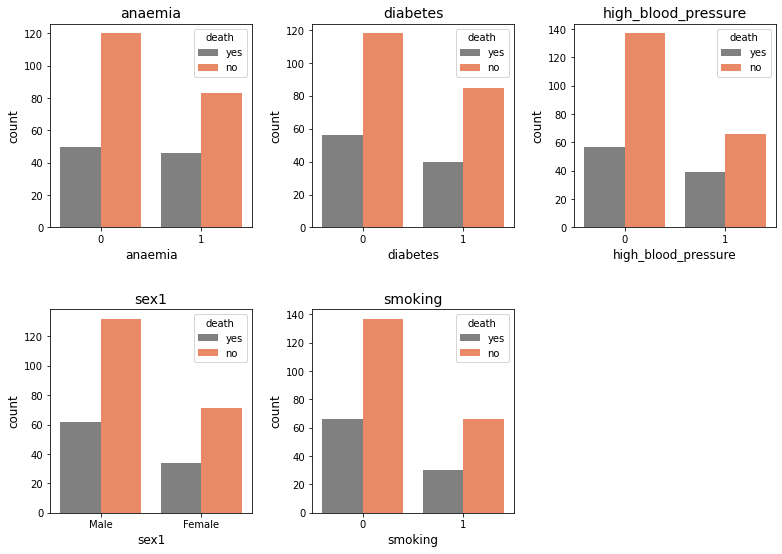

In [72]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure',
             'sex1', 'smoking']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="death", palette = ['gray', "coral"])

In [73]:
x = pd.crosstab(df["sex1"], df['death'])
x

death,no,yes
sex1,,
Female,71,34
Male,132,62


In [74]:
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
sex1,,
Female,0.676190,0.323810
Male,0.680412,0.319588


C:\Users\sadaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


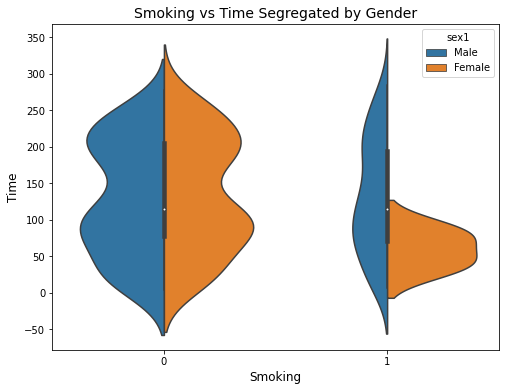

In [75]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(df.smoking, df.time, hue=df.sex1, split=True)
plt.title("Smoking vs Time Segregated by Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

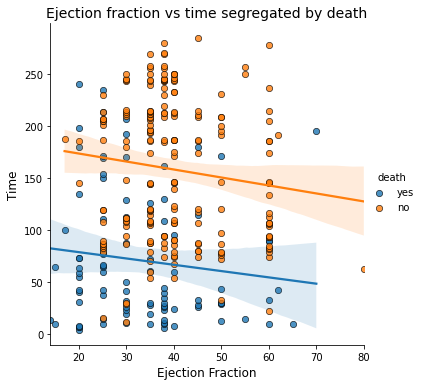

In [76]:
sns.lmplot(x="ejection_fraction", y="time", 
           hue="death", data=df, scatter_kws=dict(s=40, linewidths=0.7,
                                            edgecolors='black'))
plt.xlabel("Ejection Fraction", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title("Ejection fraction vs time segregated by death", fontsize=14)
plt.show()

<Figure size 1600x640 with 0 Axes>

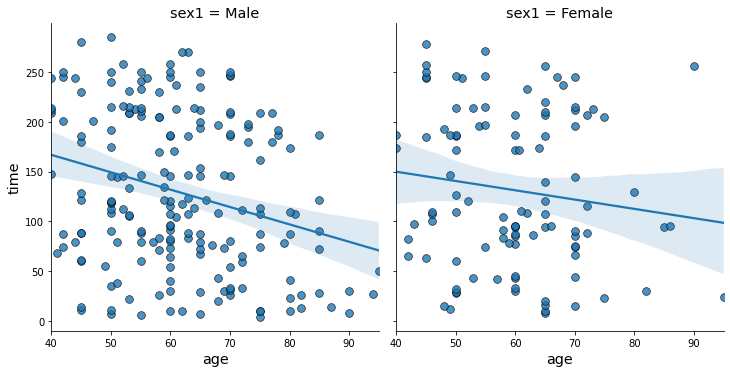

In [77]:
fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='age', y='time', 
               data = df, 
               robust = True,
              palette="Set1", col="sex1",
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='x-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')

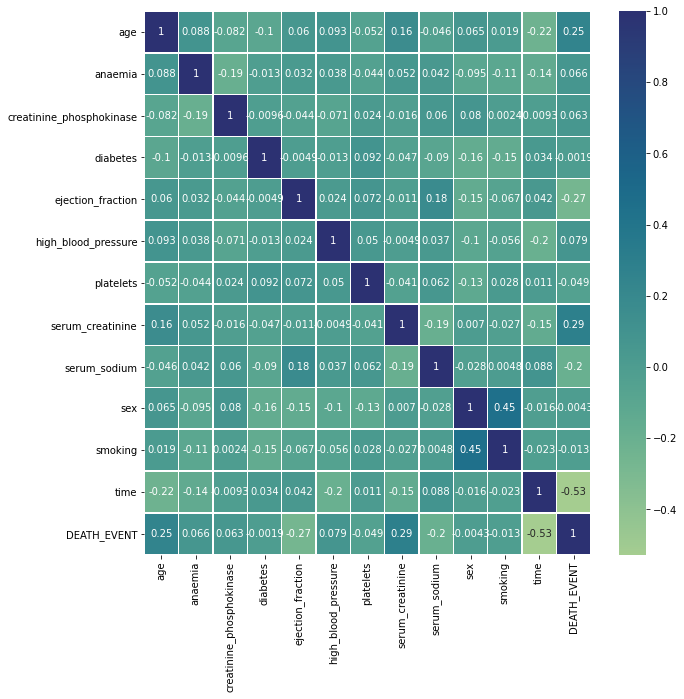

In [78]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

In [79]:
df = df.drop(columns=['sex1', 'death'])

In [80]:
df = df.dropna()

In [81]:
df = df.drop(columns=['anaemia', 'diabetes', 'sex', 'smoking', 
                       'creatinine_phosphokinase'])

In [82]:
df2 = df
continuous_var = ['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
for i in continuous_var:
    df2[i] = df2[i]/max(df2[i])

In [83]:
y = df2['DEATH_EVENT']

In [84]:
X = df2.drop(columns=['DEATH_EVENT'])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [86]:
clf_tree = DecisionTreeClassifier(random_state=21, max_depth = 7, max_leaf_nodes=6).fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]
